In [2]:
!pip install palmerpenguins

In [3]:
!pip install scikit_learn

In [4]:
import numpy as np
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [5]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


Palmer Penguins Modeling
Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict species using the other variables in the dataset.

Dummify all variables that require this.

In [6]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [13]:
ct1 = ColumnTransformer(
    [("dummify_s", OneHotEncoder(sparse_output = False), ['species']),
    ("dummify_i", OneHotEncoder(sparse_output = False), ['island']),
    ("dummify_sex", OneHotEncoder(sparse_output = False), ['sex']),]
    ,remainder = "passthrough"
).set_output(transform = 'pandas')
ct2 = ColumnTransformer(
  [
    ("standardize", StandardScaler()
     ,['remainder__bill_length_mm','remainder__flipper_length_mm','remainder__body_mass_g'])
  ],
  remainder = "passthrough"
)


Let's use the other variables to predict bill_depth_mm. Prepare your data and fit the following models on the entire dataset:

Your best multiple linear regression model from before
Two kNN models (for different values of K)
A decision tree model
Create a plot like the right plot of Fig 1. in our Model Validation chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [52]:
X = penguins.drop(["bill_depth_mm"], axis = 1)
y = penguins["bill_depth_mm"]

My first Knn

In [15]:
knn_pipeline_1 = Pipeline(
  [("dummifying", ct1),
   ('standardizing',ct2),
  ("k_nearest_neighbour", KNeighborsRegressor(5))]
)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
from sklearn.metrics import mean_squared_error

In [54]:
knn_pipeline_1.fit(X_train, y_train)


y_preds_1 = knn_pipeline_1.predict(X_test)
fitted_knn_1_pipeline=knn_pipeline_1.fit(X_train,y_train)
y_train_1 = fitted_knn_1_pipeline.predict(X_train)
mse1 = mean_squared_error(y_test, y_preds_1)
mse1

0.7992238095238097

My second Knn

In [19]:
knn_pipeline_2 = Pipeline(
  [("dummifying", ct1),
   ('standardizing',ct2),
  ("k_nearest_neighbour", KNeighborsRegressor(20))]
)

In [55]:
knn_pipeline_2.fit(X_train, y_train)


y_preds_2 = knn_pipeline_2.predict(X_test)
fitted_knn_2_pipeline=knn_pipeline_2.fit(X_train,y_train)
y_train_2 = fitted_knn_2_pipeline.predict(X_train)
mse2 = mean_squared_error(y_test, y_preds_2)
mse2

0.8341499999999998

Decision Tree Model

In [25]:
Decision_tree_pipeline = Pipeline(
  [("dummifying", ct1),
   ('standardizing',ct2),
  ("decision_tree", DecisionTreeRegressor())]
)

In [56]:
Decision_tree_pipeline.fit(X_train, y_train)


y_preds_3 = Decision_tree_pipeline.predict(X_test)
fitted_decision_tree_pipeline=Decision_tree_pipeline.fit(X_train,y_train)
y_train_3 = fitted_decision_tree_pipeline.predict(X_train)
mse3 = mean_squared_error(y_test, y_preds_3)
mse3

1.4846428571428576

Previous best linear

In [57]:
x = myData.drop(['bill_depth_mm', 'year','species','island','body_mass_g'], axis=1)


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

x_train


lr = LinearRegression()
enc = OneHotEncoder()

ct = ColumnTransformer(
    [
    ("dummify_sex", enc, ['sex'])]
)

my_pipeline = Pipeline(
    [('dummify_everything', ct), ('ols', lr)]
)


fitted_pipeline=my_pipeline.fit(x_train,y_train)
fitted_pipeline

y_preds_4 = fitted_pipeline.predict(x_test)

y_train_4 = fitted_pipeline.predict(x_train)
mse4 = mean_squared_error(y_test, y_preds_4)
mse4

3.8692629859561016

KNN with 5 neighbors is my best model out of the four options.

Graph

In [58]:
msetrain1 = mean_squared_error(y_train, y_train_1)
msetrain2 = mean_squared_error(y_train, y_train_2)
msetrain3 = mean_squared_error(y_train, y_train_3)
msetrain4 = mean_squared_error(y_train, y_train_4)

In [60]:
from pandas.core.frame import DataFrame
df = pd.DataFrame(columns=['mse', 'group', 'predictor'])
df['mse'] = [mse1, mse2, mse3, mse4, msetrain1, msetrain2, msetrain3, msetrain4]
df['group'] = ['test', 'test', 'test', 'test', 'train', 'train', 'train', 'train']
df['predictor'] = ['knn(5)', 'knn(10)', 'decisionTree', 'linear', 'knn(5)', 'knn(10)', 'decisionTree', 'linear']
df

,mse,group,predictor
0,0.799224,test,knn(5)
1,0.834150,test,knn(10)
2,1.484643,test,decisionTree
3,3.869263,test,linear
4,7.348316,train,knn(5)
5,7.139623,train,knn(10)
6,7.538474,train,decisionTree
7,3.173242,train,linear


In [62]:
from plotnine import ggplot, aes, geom_point, geom_bar,scale_y_continuous, geom_line

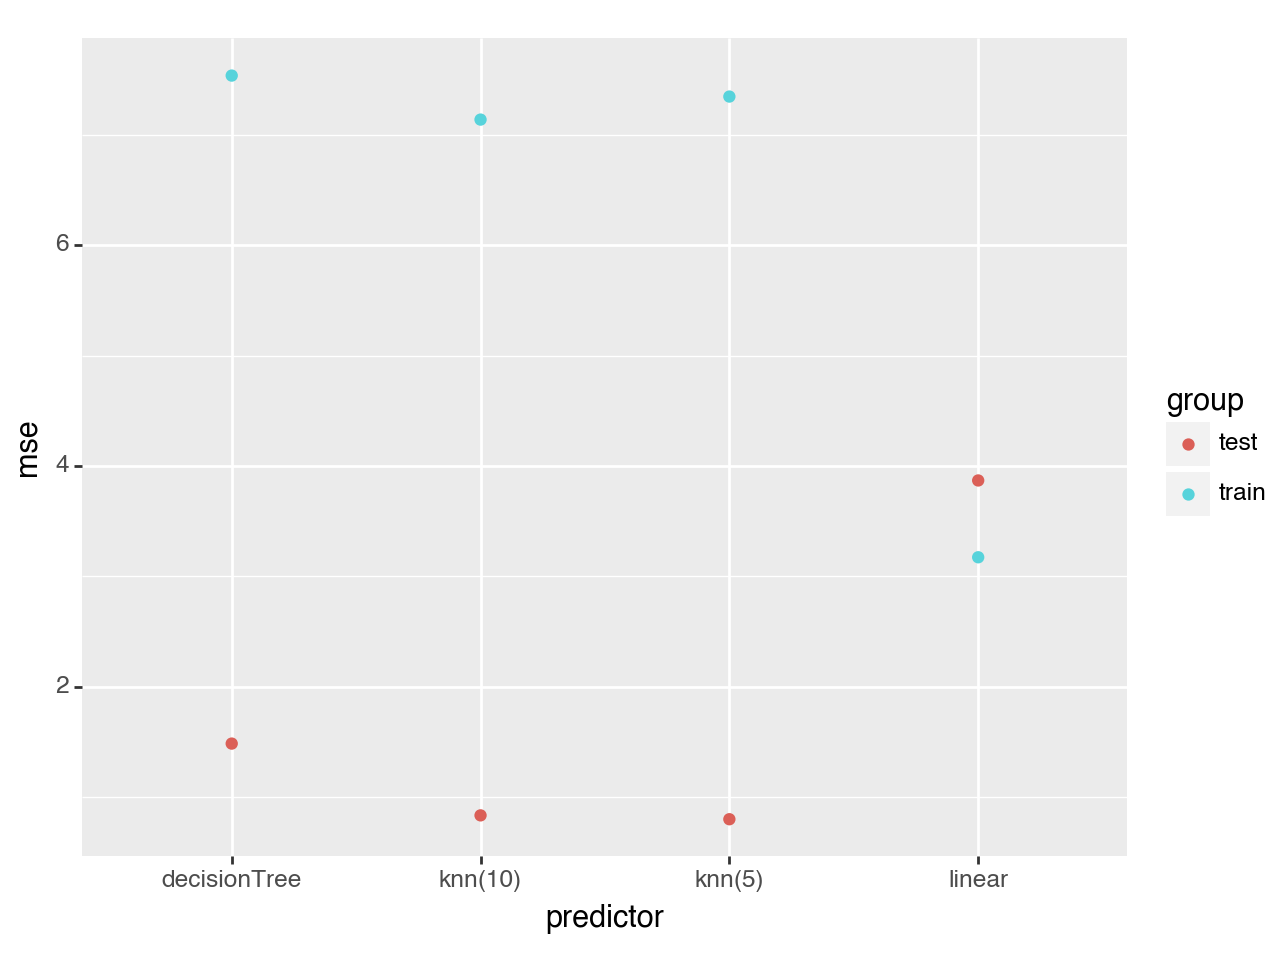

<Figure Size: (640 x 480)>

In [66]:
p = ggplot(df, aes(x='predictor', y='mse', color = 'group'))

p += geom_point()



p